# Support Vector Regression (SVR)

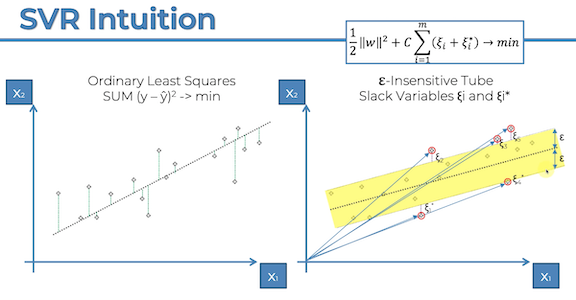

## SVR models do not have an explicit equation like y=b0 + b1X1. They have an implicit equation

## For additional reading on SVR:

## Chapter 4: Support vector regression (from: efficient learning machines: theories, concepts, and applications for engineers and systems designers)

## By Mariette Awad and Rahul Khanna (2015)

##Link: https://core.ac.uk/download/pdf/81523322.pdf
##Link: https://towardsdatascience.com/an-introduction-to-support-vector-regression-svr-a3ebc1672c2

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[:, 1:-1].values
# in this dataset we do not need the first column so X captures the position 1 column 
y = dataset.iloc[:, -1].values
# we do not train test split this data due to the low volume of observations, we need to use them all to get accurate data

In [3]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


## Feature Scaling

In [5]:
# We have to apply feature scaling on both the feature and the dependent variable in this case.
# Feature scaling general rules:
# Apply to features when they are not in the same range
# Apply to features and dependent variable when they are not in the same range
# Do not need to apply to binary features like dummy variables
# Do not need to apply to binday dependent variables

# At some point when you scale the varialbes you must inverse the scale at the end in order to get properly scaled visuals and predictions

# the dependent variable needs to be in a 2d array because the stadard scalar excepts that as an input

y = y.reshape(len(y), 1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [6]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

# A new object for sc_y is necessary because each time .fit is used the mean and standard deviation 
# is used and would overwrite if using same object
# The feature scaling standard scaler generally scales values between -3:3
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [7]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [8]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [9]:
from sklearn.svm import SVR
# For SVR we need to specify to parameter or kernel in this case to be used; to learn more about support vector machine kernels (algorithms)
# Visit: https://data-flair.training/blogs/svm-kernel-functions/#:~:text=SVM%20Kernel%20Functions&text=The%20function%20of%20kernel%20is,(RBF)%2C%20and%20sigmoid.
# The radial basis function kernel is used most commonly assuming aspects of the data are unknown
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting a new result

In [10]:
# We need to reverse the scaling in order to get the original scale of y to make sense of the outputs
# Remember that we are predicting the 6.5 for the level of the regional manager with a few years, and we must scale to match for the input
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))
print(y_pred)
# The .inverse_transform function takes the y output and transforms it back to the original scale

[170370.0204065]


## Visualising the SVR results

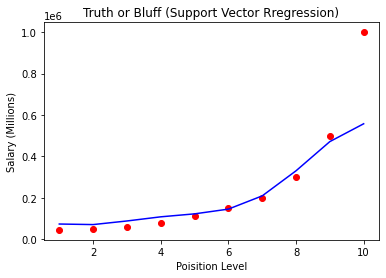

In [13]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color = "blue")
plt.title("Truth or Bluff (Support Vector Rregression)")
plt.xlabel("Poisition Level")
plt.ylabel("Salary (Millions)")
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

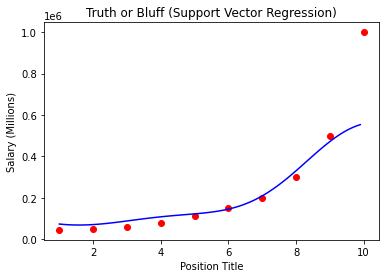

In [15]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color='blue')
plt.title('Truth or Bluff (Support Vector Regression)')
plt.xlabel('Position Title')
plt.ylabel('Salary (Millions)')
plt.show()

# This section is mostly for show as we will usually have models with multiple features that we can't plot
# We just changed the X values to be more continuous with intervals of 0.1 from 1-10